In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import mo_gymnasium as mo_gym

env = mo_gym.make("mo-lunar-lander-v2")


In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 64
hidden_size = 128
BAN_SIZE = 2
max_memory_size=2000

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=BAN_SIZE, max_memory_size=max_memory_size, train_start=100)


In [3]:
episodes = 150
mname = "fooo.model"

rewards, avg_rewards, timings = agent.agent_learning(env=env,episodes = episodes, mname=mname)


12:55:54	Episode	1	timesteps:	71	Took	1.302037 sec - reward:	[-100.0, 77.89875959604979]	| 100AvgReward: [-100.0, 77.89875959604979]
12:56:11	Episode	2	timesteps:	80	Took	16.989351 sec - reward:	[-100.0, -222.65347096323967]	| 100AvgReward: [-100.0, -72.37735568359494]
12:56:11	Episode	3	timesteps:	79	Took	0.255041 sec - reward:	[-100.0, 76.06399447470903]	| 100AvgReward: [-100.0, -22.89690563082695]
12:56:11	Episode	4	timesteps:	72	Took	0.213833 sec - reward:	[-100.0, 61.007586270570755]	| 100AvgReward: [-100.0, -1.9207826554775238]
12:56:11	Episode	5	timesteps:	62	Took	0.16831 sec - reward:	[-100.0, -25.110276076942682]	| 100AvgReward: [-100.0, -6.558681339770556]
12:56:12	Episode	6	timesteps:	66	Took	0.172591 sec - reward:	[-100.0, 28.80804681777954]	| 100AvgReward: [-100.0, -0.6642266468455394]
12:56:12	Episode	7	timesteps:	96	Took	0.284574 sec - reward:	[-100.0, 99.24155252054334]	| 100AvgReward: [-100.0, 13.6080275199243]
12:56:12	Episode	8	timesteps:	87	Took	0.225281 sec - rewar

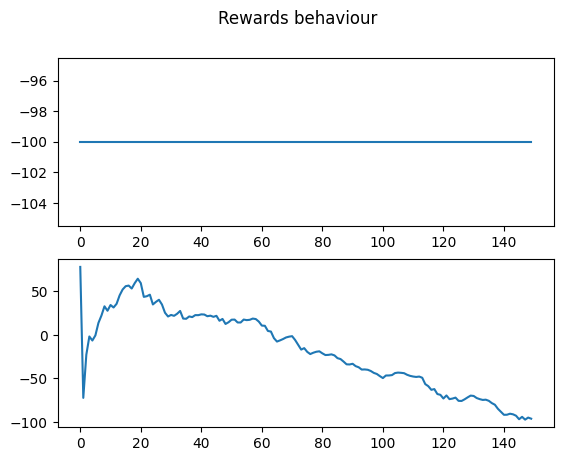

In [7]:
from matplotlib import pyplot as plt 

%matplotlib inline

def display_plot(rewards:list, episodes:int, title:str = ""):
    """
    plot the behaviour of the reawards during episodes
    #- call plt.show() to show the generated figure
    """
    
    tmp=list(zip(*rewards))
    how_many_components = len(tmp)
    
    fig, (ax_list) = plt.subplots(how_many_components)

    fig.suptitle(title)

    for i in range(how_many_components):
        ax_list[i].plot(range(episodes), tmp[i])

    plt.show()
    return fig

fig = display_plot(avg_rewards, len(rewards), "Rewards behaviour")
